In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [5]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [6]:
afinn.value.unique()

array([-2, -3,  2,  1, -1,  3,  4, -4, -5,  5,  0])

In [7]:
reviews=pd.read_csv('amazon.csv')
reviews

Unnamed: 0  reviewerName  overall  \
0              0           NaN        4   
1              1          0mie        5   
2              2           1K3        4   
3              3           1m2        5   
4              4  2&amp;1/2Men        5   
...          ...           ...      ...   
4910        4910        ZM "J"        1   
4911        4911            Zo        5   
4912        4912     Z S Liske        5   
4913        4913      Z Taylor        5   
4914        4914           Zza        5   

                                             reviewText  reviewTime  day_diff  \
0                                            No issues.  23-07-2014       138   
1     Purchased this for my device, it worked as adv...  25-10-2013       409   
2     it works as expected. I should have sprung for...  23-12-2012       715   
3     This think has worked out great.Had a diff. br...  21-11-2013       382   
4     Bought it with Retail Packaging, arrived legit...  13-07-2013       513   
...                                                 ...         ...       ...   
4910  I bought this Sandisk 16GB Class 10 to use wit...  23-07-2013       503   
4911  Used this for extending the capabilities of my...  22-08-2013       473   
4912  Great card that is very fast and reliable. It ...  31-03-2014       252   
4913  Good amount of space for the stuff I want to d...  16-09-2013       448   
4914  I've heard bad things about this 64gb Micro SD...  01-02-2014       310   

      helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
0               0           0           0                   0   
1               0           0           0                   0   
2               0           0           0                   0   
3               0           0           0                   0   
4               0           0           0                   0   
...           ...         ...         ...                 ...   
4910            0           0           0                   0   
4911            0           0           0                   0   
4912            0           0           0                   0   
4913            0           0           0                   0   
4914            0           0           0                   0   

      score_average_rating  wilson_lower_bound  
0                      0.0                 0.0  
1                      0.0                 0.0  
2                      0.0                 0.0  
3                      0.0                 0.0  
4                      0.0                 0.0  
...                    ...                 ...  
4910                   0.0                 0.0  
4911                   0.0                 0.0  
4912                   0.0                 0.0  
4913                   0.0                 0.0  
4914                   0.0                 0.0  

[4915 rows x 12 columns]

In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   int64  
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(2), int64(7), object(3)
memory usage: 460.9+ KB


In [10]:
reviews['reviewText'] = reviews['reviewText'].astype('str')

In [11]:
reviews=[reviewText.strip() for reviewText in reviews.reviewText]
# remove empty strings, because they are considered in Python as False
reviews=[reviewText for reviewText in reviews if reviewText]
reviews[0:10]

['No issues.',
 'Purchased this for my device, it worked as advertised. You can never have too much phone memory, since I download a lot of stuff this was a no brainer for me.',
 'it works as expected. I should have sprung for the higher capacity.  I think its made a bit cheesier than the earlier versions; the paint looks not as clean as before',
 "This think has worked out great.Had a diff. bran 64gb card and if went south after 3 months.This one has held up pretty well since I had my S3, now on my Note3.*** update 3/21/14I've had this for a few months and have had ZERO issue's since it was transferred from my S3 to my Note3 and into a note2. This card is reliable and solid!Cheers!",
 "Bought it with Retail Packaging, arrived legit, in a orange envelope, english version not asian like the picture shows. arrived quickly, bought a 32 and 16 both retail packaging for my htc one sv and Lg Optimus, both cards in working order, probably best price you'll get for a nice sd card",
 "It's mini

In [18]:
reviewText=' '.join(reviews)
reviewText

'No issues. Purchased this for my device, it worked as advertised. You can never have too much phone memory, since I download a lot of stuff this was a no brainer for me. it works as expected. I should have sprung for the higher capacity.  I think its made a bit cheesier than the earlier versions; the paint looks not as clean as before This think has worked out great.Had a diff. bran 64gb card and if went south after 3 months.This one has held up pretty well since I had my S3, now on my Note3.*** update 3/21/14I\'ve had this for a few months and have had ZERO issue\'s since it was transferred from my S3 to my Note3 and into a note2. This card is reliable and solid!Cheers! Bought it with Retail Packaging, arrived legit, in a orange envelope, english version not asian like the picture shows. arrived quickly, bought a 32 and 16 both retail packaging for my htc one sv and Lg Optimus, both cards in working order, probably best price you\'ll get for a nice sd card It\'s mini storage.  It doe

In [20]:
no_punc_text=reviewText.translate(str.maketrans('','',string.punctuation))
no_punc_text

'No issues Purchased this for my device it worked as advertised You can never have too much phone memory since I download a lot of stuff this was a no brainer for me it works as expected I should have sprung for the higher capacity  I think its made a bit cheesier than the earlier versions the paint looks not as clean as before This think has worked out greatHad a diff bran 64gb card and if went south after 3 monthsThis one has held up pretty well since I had my S3 now on my Note3 update 32114Ive had this for a few months and have had ZERO issues since it was transferred from my S3 to my Note3 and into a note2 This card is reliable and solidCheers Bought it with Retail Packaging arrived legit in a orange envelope english version not asian like the picture shows arrived quickly bought a 32 and 16 both retail packaging for my htc one sv and Lg Optimus both cards in working order probably best price youll get for a nice sd card Its mini storage  It doesnt do anything else and its not supp

In [21]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])
len(text_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['No', 'issues', 'Purchased', 'this', 'for', 'my', 'device', 'it', 'worked', 'as', 'advertised', 'You', 'can', 'never', 'have', 'too', 'much', 'phone', 'memory', 'since', 'I', 'download', 'a', 'lot', 'of', 'stuff', 'this', 'was', 'a', 'no', 'brainer', 'for', 'me', 'it', 'works', 'as', 'expected', 'I', 'should', 'have', 'sprung', 'for', 'the', 'higher', 'capacity', 'I', 'think', 'its', 'made', 'a']


247062

In [22]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['No', 'issues', 'Purchased', 'device', 'worked', 'advertised', 'You', 'never', 'much', 'phone', 'memory', 'since', 'download', 'lot', 'stuff', 'brainer', 'works', 'expected', 'sprung', 'higher', 'capacity', 'think', 'made', 'bit', 'cheesier', 'earlier', 'versions', 'paint', 'looks', 'clean', 'This', 'think', 'worked', 'greatHad', 'diff', 'bran', '64gb', 'card', 'went', 'south', '3', 'monthsThis', 'one', 'held', 'pretty', 'well', 'since', 'S3', 'Note3', 'update', '32114Ive', 'months', 'ZERO', 'issues', 'since', 'transferred', 'S3', 'Note3', 'note2', 'This', 'card', 'reliable', 'solidCheers', 'Bought', 'Retail', 'Packaging', 'arrived', 'legit', 'orange', 'envelope', 'english', 'version', 'asian', 'like', 'picture', 'shows', 'arrived', 'quickly', 'bought', '32', '16', 'retail', 'packaging', 'htc', 'one', 'sv', 'Lg', 'Optimus', 'cards', 'working', 'order', 'probably', 'best', 'price', 'youll', 'get', 'nice', 'sd', 'card', 'Its', 'mini', 'storage', 'doesnt', 'anything', 'else', 'supposed',

In [23]:
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['no', 'issues', 'purchased', 'device', 'worked', 'advertised', 'you', 'never', 'much', 'phone', 'memory', 'since', 'download', 'lot', 'stuff', 'brainer', 'works', 'expected', 'sprung', 'higher', 'capacity', 'think', 'made', 'bit', 'cheesier', 'earlier', 'versions', 'paint', 'looks', 'clean', 'this', 'think', 'worked', 'greathad', 'diff', 'bran', '64gb', 'card', 'went', 'south', '3', 'monthsthis', 'one', 'held', 'pretty', 'well', 'since', 's3', 'note3', 'update', '32114ive', 'months', 'zero', 'issues', 'since', 'transferred', 's3', 'note3', 'note2', 'this', 'card', 'reliable', 'solidcheers', 'bought', 'retail', 'packaging', 'arrived', 'legit', 'orange', 'envelope', 'english', 'version', 'asian', 'like', 'picture', 'shows', 'arrived', 'quickly', 'bought', '32', '16', 'retail', 'packaging', 'htc', 'one', 'sv', 'lg', 'optimus', 'cards', 'working', 'order', 'probably', 'best', 'price', 'youll', 'get', 'nice', 'sd', 'card', 'its', 'mini', 'storage', 'doesnt', 'anything', 'else', 'supposed',

Lemmatization

In [24]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['no', 'issue', 'purchase', 'device', 'work', 'advertise', 'you', 'never', 'much', 'phone', 'memory', 'since', 'download', 'lot', 'stuff', 'brainer', 'work', 'expect', 'spring', 'high', 'capacity', 'think', 'make', 'bit', 'cheesier', 'early', 'version', 'paint', 'look', 'clean', 'this', 'think', 'work', 'greathad', 'diff', 'bran', '64', 'gb', 'card', 'go', 'south', '3', 'monthsthis', 'one', 'hold', 'pretty', 'well', 'since', 's3', 'note3', 'update', '32114ive', 'month', 'zero', 'issue', 'since', 'transfer', 's3', 'note3', 'note2', 'this', 'card', 'reliable', 'solidcheer', 'buy', 'retail', 'packaging', 'arrive', 'legit', 'orange', 'envelope', 'english', 'version', 'asian', 'like', 'picture', 'show', 'arrive', 'quickly', 'buy', '32', '16', 'retail', 'packaging', 'htc', 'one', 'sv', 'lg', 'optimus', 'card', 'working', 'order', 'probably', 'good', 'price', 'you', 'll', 'get', 'nice', 'sd', 'card', 'its', 'mini', 'storage', 'do', 'not', 'anything', 'else', 'suppose', 'purchase', 'add', 'add

Feature Extraction

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)
print(cv.vocabulary_)
print(reviewscv.toarray()[150:300])
print(reviewscv.toarray().shape)

{'no': 5736, 'issue': 4727, 'purchase': 6744, 'device': 2822, 'work': 9346, 'advertise': 1144, 'you': 9503, 'never': 5692, 'much': 5585, 'phone': 6266, 'memory': 5340, 'since': 7711, 'download': 3005, 'lot': 5134, 'stuff': 8124, 'brainer': 1793, 'expect': 3392, 'spring': 7977, 'high': 4302, 'capacity': 1978, 'think': 8460, 'make': 5197, 'bit': 1689, 'cheesier': 2181, 'early': 3100, 'version': 9026, 'paint': 6107, 'look': 5112, 'clean': 2240, 'this': 8466, 'greathad': 4085, 'diff': 2860, 'bran': 1796, '64': 843, 'gb': 3917, 'card': 1993, 'go': 4001, 'south': 7882, 'monthsthis': 5525, 'one': 5915, 'hold': 4343, 'pretty': 6557, 'well': 9213, 's3': 7278, 'note3': 5788, 'update': 8875, '32114ive': 474, 'month': 5519, 'zero': 9527, 'transfer': 8640, 'note2': 5787, 'reliable': 7028, 'solidcheer': 7841, 'buy': 1893, 'retail': 7145, 'packaging': 6085, 'arrive': 1421, 'legit': 4994, 'orange': 5985, 'envelope': 3238, 'english': 3208, 'asian': 1432, 'like': 5038, 'picture': 6344, 'show': 7666, 'qu

# **TF-IDF**

In [31]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(2,3),max_features=100,stop_words=my_stop_words)
bow_matrix_ngram=cv_ngram_range.fit_transform(reviews)
print(cv_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['10 card' '16 gb' '32 gb' '32gb card' '64 gb' '64gb card' 'android phone'
 'another one' 'bought card' 'bought one' 'card adapter' 'card fast'
 'card great' 'card phone' 'card reader' 'card use' 'card worked'
 'card works' 'card works great' 'card would' 'cell phone' 'class 10'
 'class 10 card' 'extra storage' 'far good' 'fast enough' 'fast reliable'
 'format card' 'galaxy note' 'galaxy note 10' 'galaxy note ii' 'galaxy s3'
 'galaxy s4' 'galaxy tab' 'gb card' 'go pro' 'go wrong' 'good price'
 'gopro hero' 'great price' 'great product' 'hd video' 'highly recommend'
 'highly recommended' 'internal memory' 'like charm' 'make sure'
 'memory card' 'memory cards' 'micro sd' 'micro sd card' 'microsd card'
 'microsd cards' 'much say' 'never problem' 'new samsung' 'note 10'
 'note ii' 'phone works' 'photos videos' 'pictures videos' 'read write'
 'read write speeds' 'recommend anyone' 'recommend product'
 'samsung galaxy' 'samsung galaxy note' 'samsung galaxy s3'
 'samsung galaxy s4' 'samsung g

# **Word Cloud**

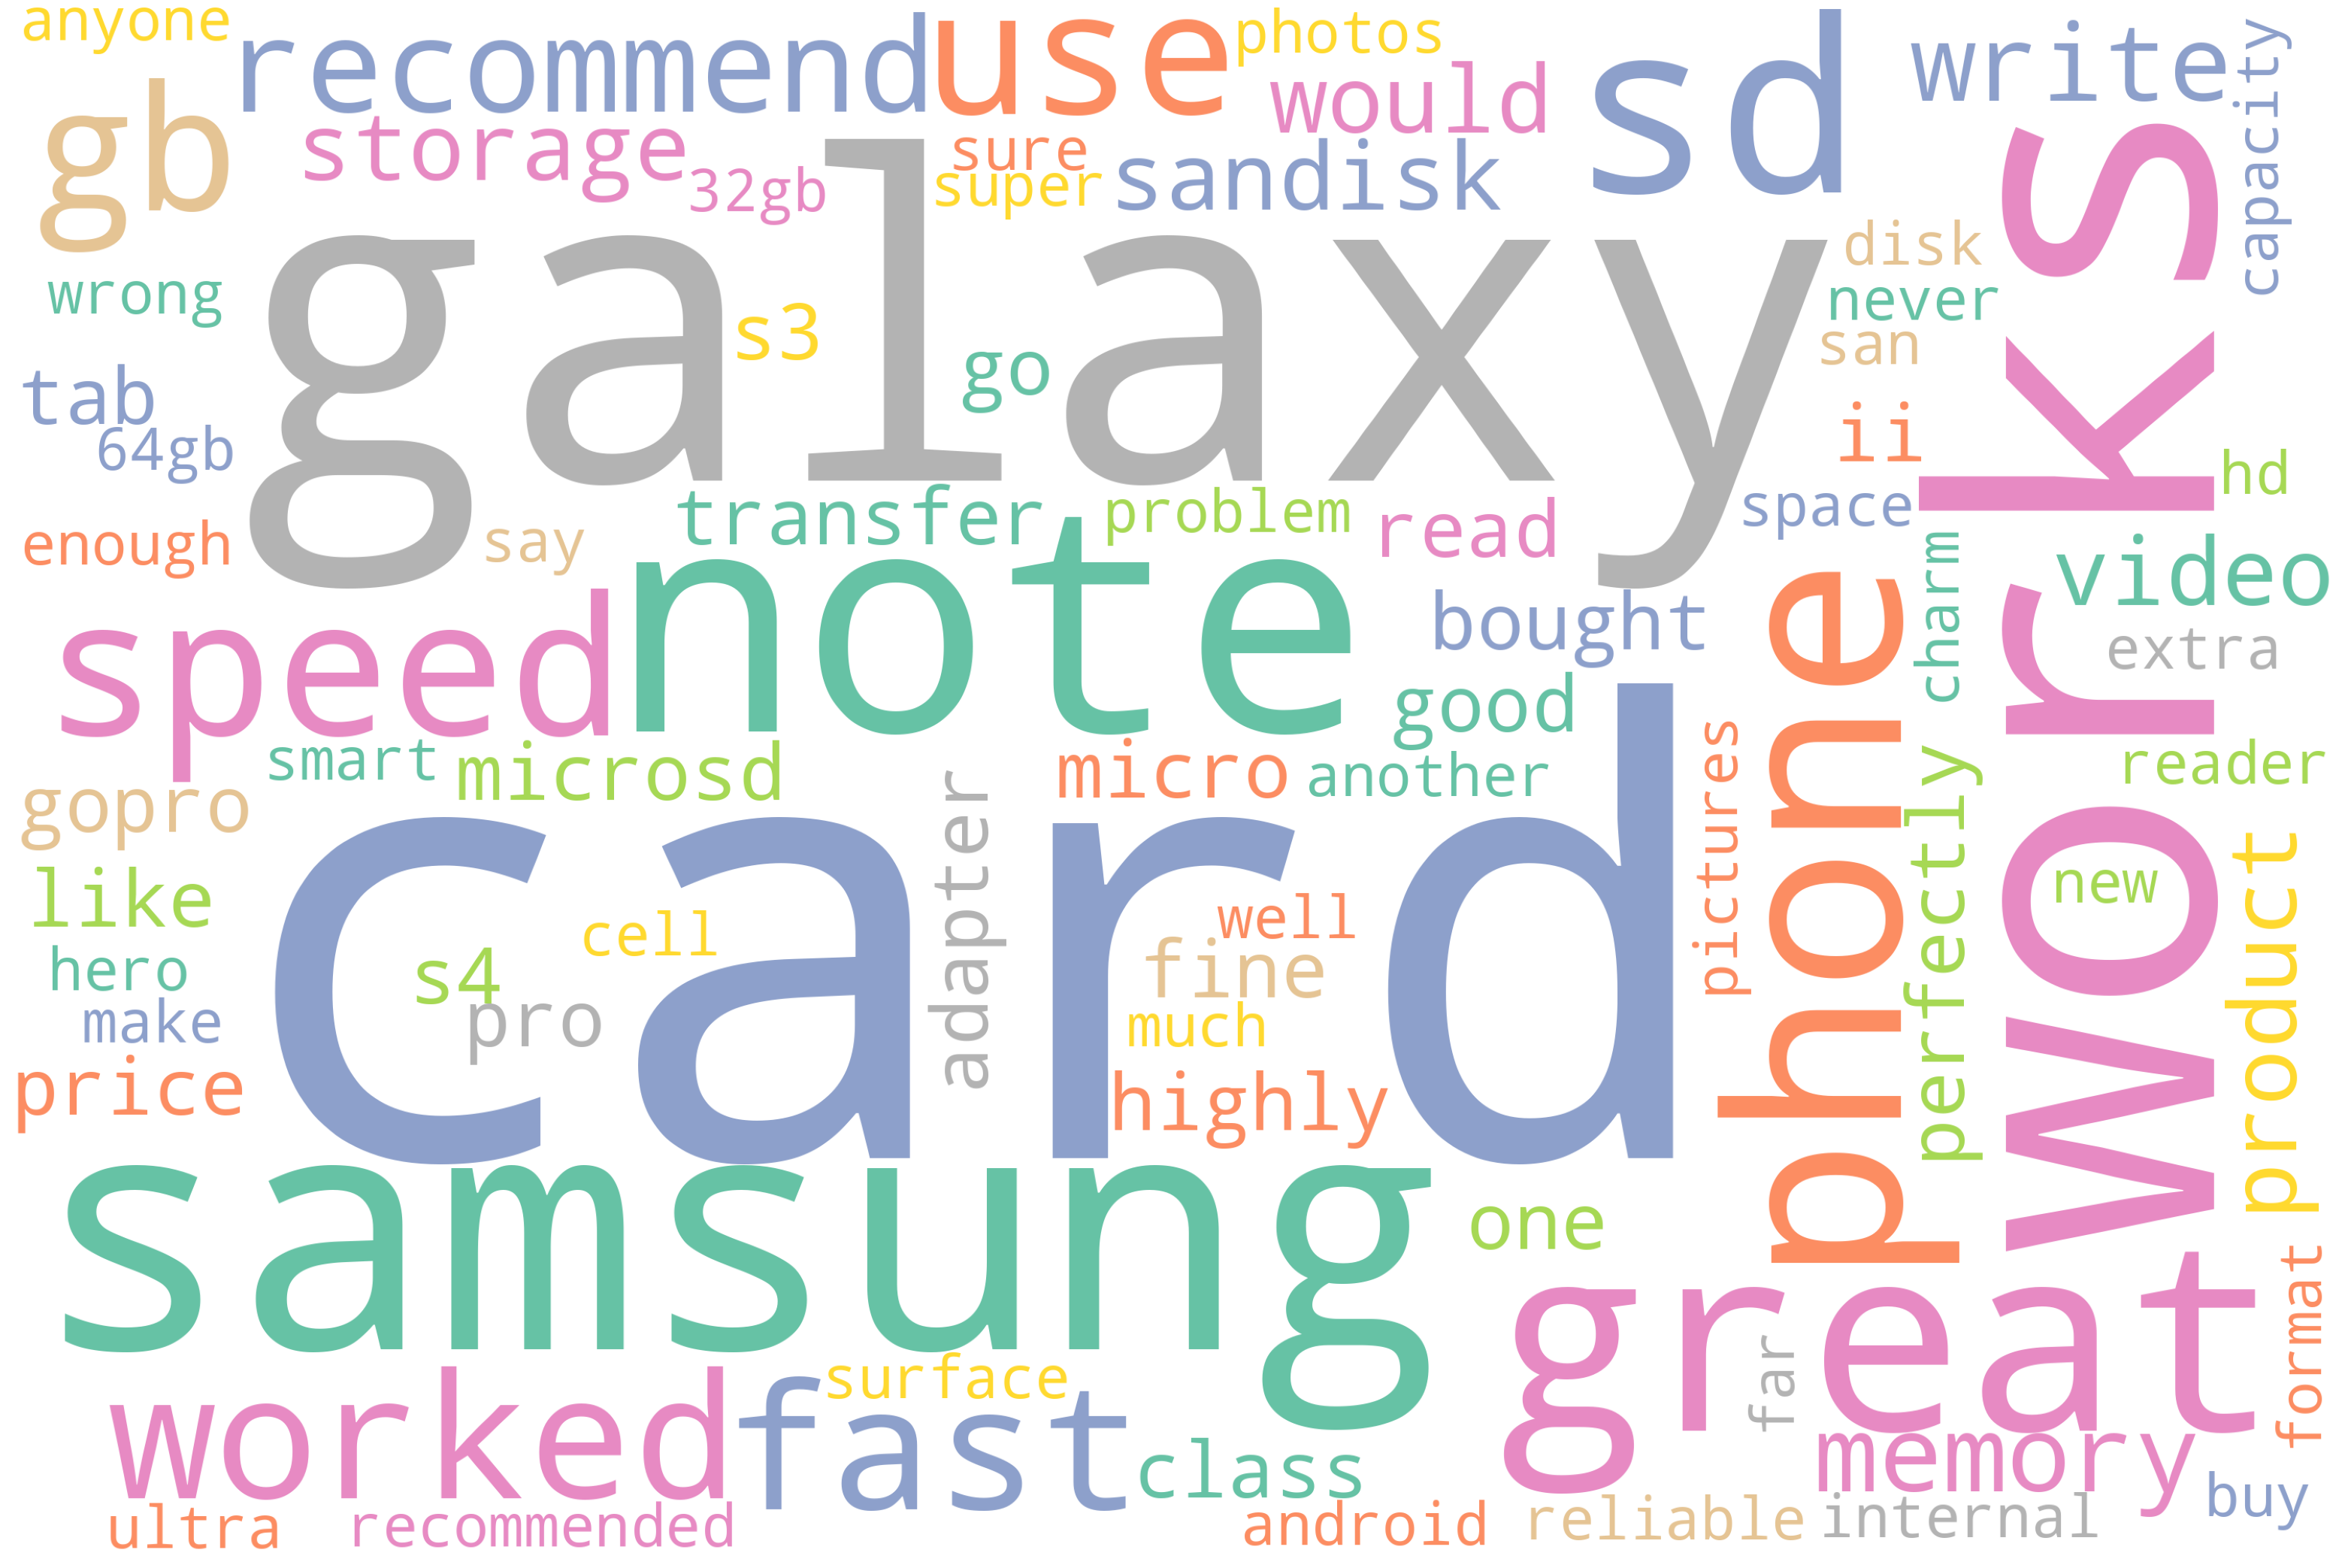

In [30]:
clean_reviews2=' '.join(tfidfv_ngram_max_features.get_feature_names_out())
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud
STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=my_stop_words).generate(clean_reviews2)
plot_cloud(wordcloud)

In [34]:
sentences = tokenize.sent_tokenize(" ".join(reviews))
sentences[5:15]

['I think its made a bit cheesier than the earlier versions; the paint looks not as clean as before This think has worked out great.Had a diff.',
 'bran 64gb card and if went south after 3 months.This one has held up pretty well since I had my S3, now on my Note3.',
 "*** update 3/21/14I've had this for a few months and have had ZERO issue's since it was transferred from my S3 to my Note3 and into a note2.",
 'This card is reliable and solid!Cheers!',
 'Bought it with Retail Packaging, arrived legit, in a orange envelope, english version not asian like the picture shows.',
 "arrived quickly, bought a 32 and 16 both retail packaging for my htc one sv and Lg Optimus, both cards in working order, probably best price you'll get for a nice sd card It's mini storage.",
 "It doesn't do anything else and it's not supposed to.",
 'I purchased it to add additional storage to my Microsoft Surface Pro tablet which only come in 64 and 128 GB.',
 "It does what it's supposed to and SanDisk has a long

In [35]:
sent_df = pd.DataFrame(sentences, columns=['sentences'])
sent_df

sentences
0                                             No issues.
1      Purchased this for my device, it worked as adv...
2      You can never have too much phone memory, sinc...
3                                  it works as expected.
4          I should have sprung for the higher capacity.
...                                                  ...
15627  Good amount of space for the stuff I want to d...
15628                               What more can I say?
15629  I've heard bad things about this 64gb Micro SD...
15630  Transfer speeds are normal but I like to be sp...
15631      For the price it was a steal!Would recommend.

[15632 rows x 1 columns]

In [36]:
affinity_score = afinn.set_index('word')['value'].to_dict()
affinity_score

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [37]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_score

def calculate_sentiment(text: str=None):
  sent_score = 0
  if text:
    sentence = nlp(text)
    print(sentence)
    for word in sentence:
      sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [38]:
sent_df['sentence_value'] = sent_df['sentences'].apply(calculate_sentiment)

Streaming output truncated to the last 5000 lines.
I am hoping that I received a defective product and that my experience is rare, but this product did not work as intended.
I was replacing another 32G micro sd card thinking that, because this is a Class 10 rated product, it would be faster.
It never worked correctly.
It kept dismounting unexpectedly, losing data, and was just not worth the money AT ALL!
I ended up using my slower rated product which has worked reliably since the day I bought it.
I only wish this product had done the same.
I bought exactly the same micro SDHC SanDisk Ultra 32GB about a year ago and which I'm using daily.
This stuff is reliable, it has never gave me any sort of problem.
My setup for this card is like a hard drive in a PC where I Read/Write a lot of large amount of data everytime like video files, photos, maps, documents and it has been working flawlessly.
Not an instance I recall that it failed me and also it is fast.
My tablet is my PC now and I'm usin

In [39]:
sent_df.head()

sentences  sentence_value
0                                         No issues.              -1
1  Purchased this for my device, it worked as adv...               0
2  You can never have too much phone memory, sinc...              -1
3                              it works as expected.               0
4      I should have sprung for the higher capacity.               0

In [40]:
sent_df['word_count'] = sent_df['sentences'].str.split().apply(len)
sent_df['word_count'].head(10)

0     2
1     9
2    22
3     4
4     8
5    27
6    25
7    28
8     6
9    19
Name: word_count, dtype: int64

In [41]:
sent_df[:10]

sentences  sentence_value  \
0                                         No issues.              -1   
1  Purchased this for my device, it worked as adv...               0   
2  You can never have too much phone memory, sinc...              -1   
3                              it works as expected.               0   
4      I should have sprung for the higher capacity.               0   
5  I think its made a bit cheesier than the earli...               5   
6  bran 64gb card and if went south after 3 month...               1   
7  *** update 3/21/14I've had this for a few mont...               0   
8            This card is reliable and solid!Cheers!               0   
9  Bought it with Retail Packaging, arrived legit...               2   

   word_count  
0           2  
1           9  
2          22  
3           4  
4           8  
5          27  
6          25  
7          28  
8           6  
9          19

In [42]:
sent_df.sort_values(by='sentence_value').tail(10)

sentences  sentence_value  \
13216  While the class 10 speed is excellent (it's am...              14   
4848   Nice product,has plenty of space and is very q...              14   
12458  Please give me a moment while I look into your...              14   
5023   XC is pretty quick and I am enjoying mine on m...              15   
125    I bougth this micro SD card after some trubles...              15   
147    not much to say other than plug and play, good...              15   
3724   The speed is great i use it in my Galaxy Tab 3...              17   
5376   the best quality there is in memories is super...              19   
5218   Great performance for full HD video.Shipping w...              20   
4027   what can I say it's a memory card okay it is f...              21   

       word_count  
13216          46  
4848           73  
12458         299  
5023           87  
125           181  
147            44  
3724           76  
5376           38  
5218           64  
4027           30

In [43]:
sent_df.sentence_value.describe()

count    15632.000000
mean         0.845061
std          2.302735
min        -21.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         21.000000
Name: sentence_value, dtype: float64